In [399]:
import numpy as np
import pandas as pd

In [400]:
df = pd.read_csv("spam.csv" , encoding=('ISO-8859-1') ,low_memory = False )

In [401]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [402]:
df.shape

(5572, 5)

In [403]:
# 1. data cleaning
# 2. EDA
# 3. Text processing
# 4.Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8.Deploy

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [405]:
df.drop(columns=[ "Unnamed: 2", "Unnamed: 3"  , "Unnamed: 4"  ], inplace=True)


In [406]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [407]:
df.rename(columns={'v1':'target' , 'v2':'text'},inplace= True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [408]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [409]:
df['target']= encoder.fit_transform(df['target'])

In [410]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [411]:
df['num_character'] = df['text'].apply(len)

In [412]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [413]:
import nltk
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [414]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [415]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [416]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [417]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [418]:
df[df['target'] == 0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [419]:
df[df['target'] == 1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [420]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

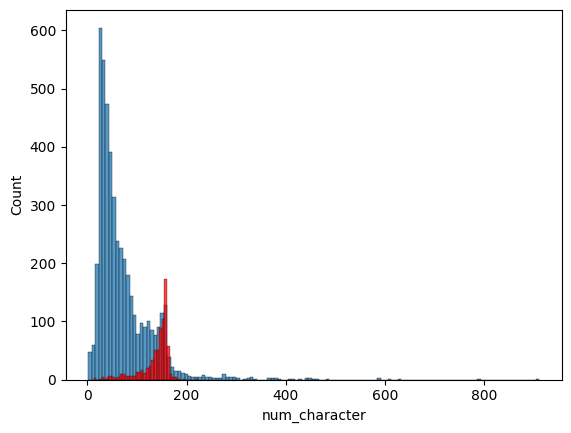

In [421]:

sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

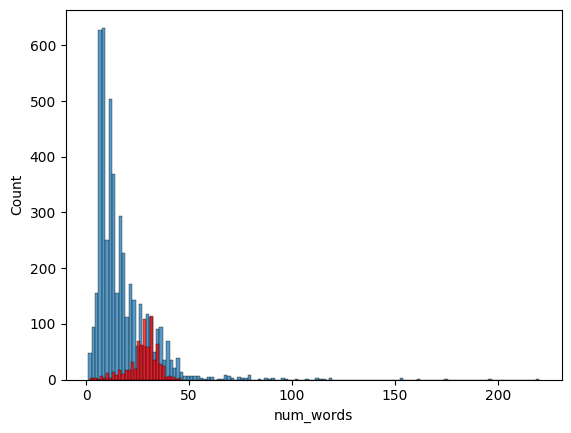

In [422]:

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

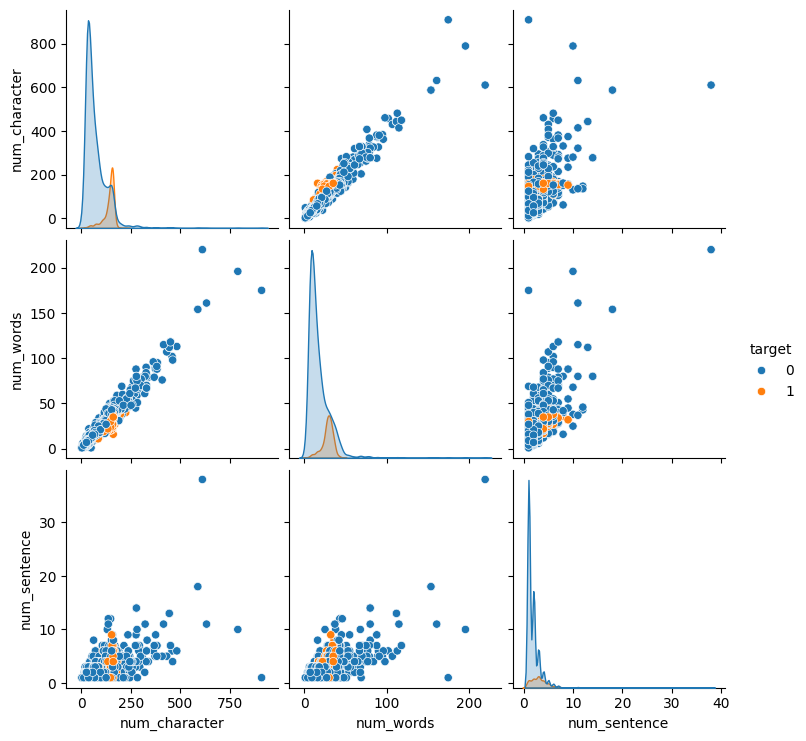

In [423]:
sns.pairplot(df,hue='target')

In [424]:
print(df.dtypes)


target            int64
text             object
num_character     int64
num_words         int64
num_sentence      int64
dtype: object


In [425]:
print(df.select_dtypes(exclude=['number']).head())


                                                text
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
3  U dun say so early hor... U c already then say...
4  Nah I don't think he goes to usf, he lives aro...


<Axes: >

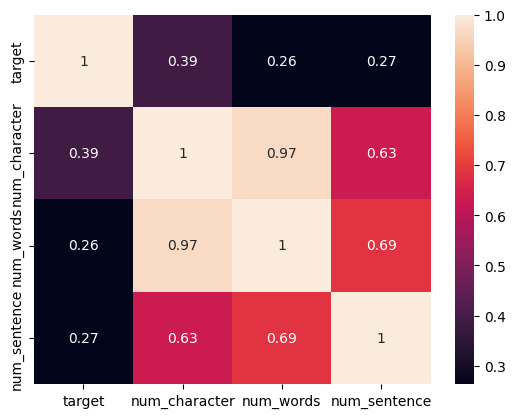

In [426]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numerical columns
sns.heatmap(df_numeric.corr() , annot=True)  # Generate heatmap


In [427]:
# Data Preprocessing
# lower case
# tokenization
#removing special characters
# removing stop words and punctuation
# stemming

In [428]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:  
        y.append(ps.stem(i))
    return " ".join(y)

In [429]:
from nltk.corpus import stopwords
stopwords.words('English')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [430]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [431]:
transform_text ('Hlo How are You %% Bhai')
transform_text ('do You like my presentation on ml')
transform_text ('I loved the reading Books on machine learning')

'love read book machin learn'

In [432]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('gaming')

'game'

In [433]:
df['transformed_text'] = df['text'].apply(transform_text)

In [434]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [435]:
from wordcloud import WordCloud


In [436]:
import wordcloud
print(wordcloud.__version__)  # Should print the installed version


1.9.4


In [437]:

wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')

In [438]:
spam_wc = wc.generate(df[df['target'] == 1 ]['transformed_text'].str.cat(sep=" "))

In [439]:
import matplotlib.pyplot as plt


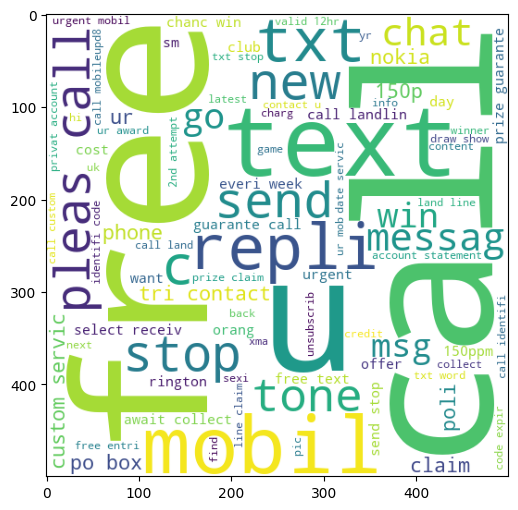

In [440]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [441]:
ham_wc = wc.generate(df[df['target'] == 1 ]['transformed_text'].str.cat(sep=" "))

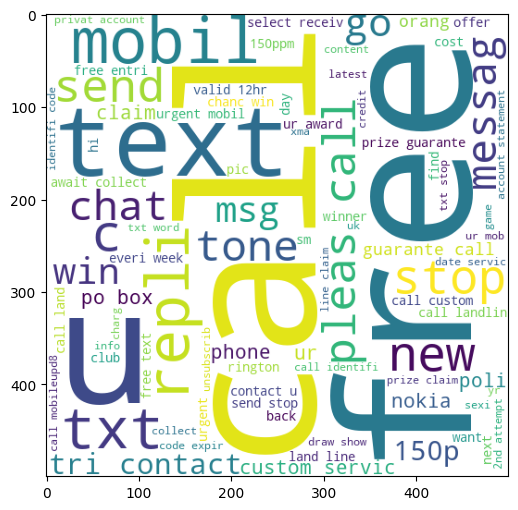

In [442]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [443]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [444]:
len(spam_corpus)

11490

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


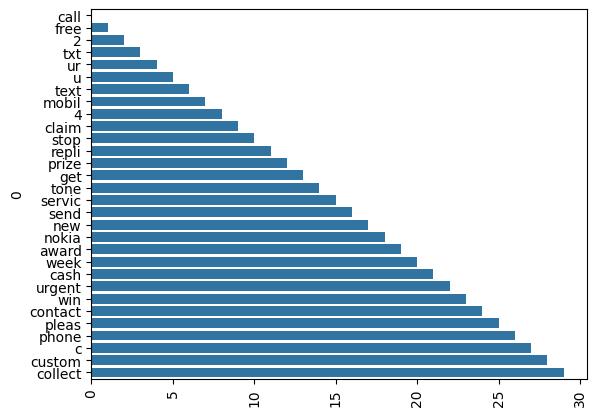

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [447]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)         

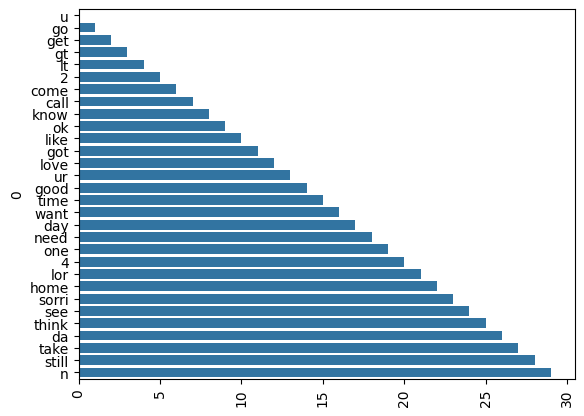

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [449]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [450]:
#model building


In [451]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features=3000 )


In [452]:
x = np.hstack((x,df['num_character'].values.reshape(-1,1)))

In [453]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [454]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [455]:
x.shape


(5572, 3000)

In [456]:
y = df['target'].values

In [457]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [458]:
from sklearn.model_selection import train_test_split

In [459]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [460]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [461]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [462]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8663677130044843
[[831 126]
 [ 23 135]]
0.5172413793103449


In [463]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9704035874439462
[[949   8]
 [ 25 133]]
0.9432624113475178


In [464]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [465]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [466]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xbg = XGBClassifier(n_estimators=50, random_state=2)


In [467]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' :bc,
    'ETC' : etc,
    'GBDT' :gbdt,
    'xgb' :xbg
}  

In [468]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [469]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9650224215246637, 0.9612403100775194)

In [470]:
print(data_performance_df1.isnull().sum())


Algorithm                0
Accuracy                 0
Precision                0
Accuracy_max_ft_3000     0
Precision_max_ft_3000    0
dtype: int64


In [471]:
print(data_performance_df1.dtypes)


Algorithm                 object
Accuracy                 float64
Precision                float64
Accuracy_max_ft_3000     float64
Precision_max_ft_3000    float64
dtype: object


In [472]:
print(len(clfs.keys()))  # Number of algorithms
print(len(accuracy_scores))  # Number of accuracy values
print(len(precision_scores))  # Number of precision values


11
11
11


In [473]:
import numpy as np
max_len = max(len(clfs.keys()), len(accuracy_scores), len(precision_scores))

accuracy_scores += [np.nan] * (max_len - len(accuracy_scores))
precision_scores += [np.nan] * (max_len - len(precision_scores))


In [474]:
data_performance_df1 = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # Convert to list to ensure proper length
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Accuracy', ascending=False)


In [475]:
performance_df1 = pd.melt(data_performance_df1 , id_vars = 'Algorithm')

In [476]:
# Fill NaN values with the mean of each column
data_performance_df1['Accuracy'].fillna(data_performance_df1['Accuracy'].mean(), inplace=True)
data_performance_df1['Precision'].fillna(data_performance_df1['Precision'].mean(), inplace=True)

# Print to check if NaN values are filled
print(data_performance_df1)



   Algorithm  Accuracy  Precision
0        SVC  0.972197   0.984733
2         NB  0.965022   0.991736
3         DT  0.926457   0.865385
1         KN  0.904933   1.000000
4         LR  0.942152   0.960463
5         RF  0.942152   0.960463
6   AdaBoost  0.942152   0.960463
7        BgC  0.942152   0.960463
8        ETC  0.942152   0.960463
9       GBDT  0.942152   0.960463
10       xgb  0.942152   0.960463


C:\Users\mehak\AppData\Local\Temp\ipykernel_5404\1547518499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_performance_df1['Accuracy'].fillna(data_performance_df1['Accuracy'].mean(), inplace=True)
C:\Users\mehak\AppData\Local\Temp\ipykernel_5404\1547518499.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [477]:
print(data_performance_df1.head(11))

   Algorithm  Accuracy  Precision
0        SVC  0.972197   0.984733
2         NB  0.965022   0.991736
3         DT  0.926457   0.865385
1         KN  0.904933   1.000000
4         LR  0.942152   0.960463
5         RF  0.942152   0.960463
6   AdaBoost  0.942152   0.960463
7        BgC  0.942152   0.960463
8        ETC  0.942152   0.960463
9       GBDT  0.942152   0.960463
10       xgb  0.942152   0.960463


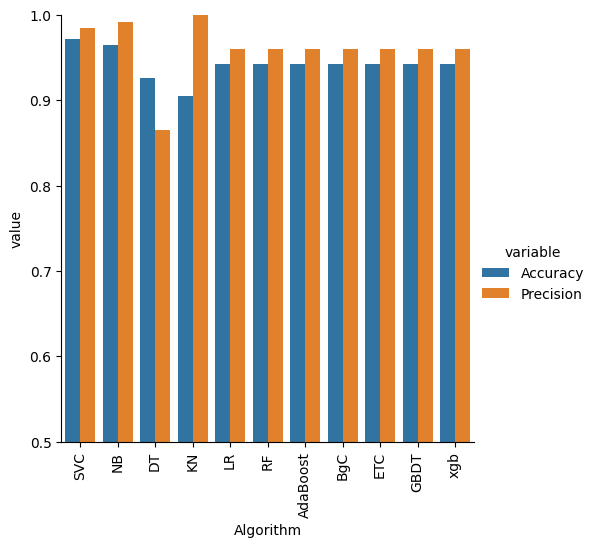

In [478]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert wide format (columns 'Accuracy' & 'Precision') to long format
performance_df1_melted = data_performance_df1.melt(id_vars=['Algorithm'], 
                                                    value_vars=['Accuracy', 'Precision'], 
                                                    var_name='variable', 
                                                    value_name='value')

# Plot using seaborn
sns.catplot(x='Algorithm', y='value', hue='variable', 
            data=performance_df1_melted, kind='bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [479]:
#model improve

In [480]:
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # Convert dict keys to a list
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores  # Add missing value
})


In [481]:
print(data_performance_df1[data_performance_df1.isna().any(axis=1)])


Empty DataFrame
Columns: [Algorithm, Accuracy, Precision]
Index: []


In [482]:
# Check available columns
print("Columns in DataFrame:", data_performance_df1.columns)

# Ensure the column exists
if 'Accuracy_max_ft_3000' not in data_performance_df1.columns:
    data_performance_df1['Accuracy_max_ft_3000'] = data_performance_df1['Accuracy']

if 'Precision_max_ft_3000' not in data_performance_df1.columns:
    data_performance_df1['Precision_max_ft_3000'] = data_performance_df1['Precision']

# Fill NaN values
data_performance_df1['Accuracy_max_ft_3000'].fillna(data_performance_df1['Accuracy_max_ft_3000'].mean(), inplace=True)
data_performance_df1['Precision_max_ft_3000'].fillna(data_performance_df1['Precision_max_ft_3000'].mean(), inplace=True)

print(data_performance_df1)


Columns in DataFrame: Index(['Algorithm', 'Accuracy', 'Precision'], dtype='object')
   Algorithm  Accuracy  Precision  Accuracy_max_ft_3000  Precision_max_ft_3000
0        SVC  0.972197   0.984733              0.972197               0.984733
2         NB  0.965022   0.991736              0.965022               0.991736
3         DT  0.926457   0.865385              0.926457               0.865385
1         KN  0.904933   1.000000              0.904933               1.000000
4         LR  0.942152   0.960463              0.942152               0.960463
5         RF  0.942152   0.960463              0.942152               0.960463
6   AdaBoost  0.942152   0.960463              0.942152               0.960463
7        BgC  0.942152   0.960463              0.942152               0.960463
8        ETC  0.942152   0.960463              0.942152               0.960463
9       GBDT  0.942152   0.960463              0.942152               0.960463
10       xgb  0.942152   0.960463              

C:\Users\mehak\AppData\Local\Temp\ipykernel_5404\1020027032.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_performance_df1['Accuracy_max_ft_3000'].fillna(data_performance_df1['Accuracy_max_ft_3000'].mean(), inplace=True)
C:\Users\mehak\AppData\Local\Temp\ipykernel_5404\1020027032.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

In [483]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample Data
df = pd.DataFrame({
    'Algorithm': ['SVC', 'NB', 'DT', 'KN', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb'],
    'Accuracy': [0.972, 0.965, 0.926, 0.904, 0.942, 0.942, 0.942, 0.942, 0.942, 0.942, 0.942],
    'Precision': [0.985, 0.992, 0.865, 1.000, 0.960, 0.960, 0.960, 0.960, 0.960, 0.960, 0.960]
})

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax Scaling (Ensuring All Values are 0 to 1)
df[['Accuracy_scaling', 'Precision_scaling']] = scaler.fit_transform(df[['Accuracy', 'Precision']])

# Print result
print(df)


   Algorithm  Accuracy  Precision  Accuracy_scaling  Precision_scaling
0        SVC     0.972      0.985          1.000000           0.888889
1         NB     0.965      0.992          0.897059           0.940741
2         DT     0.926      0.865          0.323529           0.000000
3         KN     0.904      1.000          0.000000           1.000000
4         LR     0.942      0.960          0.558824           0.703704
5         RF     0.942      0.960          0.558824           0.703704
6   AdaBoost     0.942      0.960          0.558824           0.703704
7        BgC     0.942      0.960          0.558824           0.703704
8        ETC     0.942      0.960          0.558824           0.703704
9       GBDT     0.942      0.960          0.558824           0.703704
10       xgb     0.942      0.960          0.558824           0.703704


In [484]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier

# Correcting the SVC initialization
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)  # ✅ Fixed 'kernel'

# Other classifiers
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [485]:
voting = VotingClassifier( estimators= [('svm' , svc) , ('nb', mnb) , ('et' , etc)], voting = 'soft')

In [486]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [487]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748878923766816
Precision 0.9924242424242424


In [488]:
estimators = [('svm', svc ), ('nb', mnb), ('et', etc)]
final_estimators = RandomForestClassifier()

In [489]:
from sklearn.ensemble import StackingClassifier

In [490]:
clf = StackingClassifier( estimators = estimators)

In [492]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [494]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df['label'].value_counts())


label
ham     4825
spam     747
Name: count, dtype: int64


In [496]:
from imblearn.over_sampling import RandomOverSampler

# Convert labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Oversampling Spam messages
X = df['message']
y = df['label']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# Convert back to DataFrame
df_balanced = pd.DataFrame({'message': X_resampled.flatten(), 'label': y_resampled})

print(df_balanced['label'].value_counts())  # Spam & Not Spam ka count dekhein


label
0    4825
1    4825
Name: count, dtype: int64


In [593]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Dataset Load Karein
df = pd.read_csv("spam.csv", encoding='latin-1')

# Sirf Zaroori Columns Rakhein
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Labels Convert Karein (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Data Split Karein
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)



In [594]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)  # 🟢 Now it will work

# Model Train Karein
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [597]:
# Model Save Karein
with open('vectorize.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [596]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

model.fit(X_resampled, y_resampled)


MultinomialNB()

In [598]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)  # Ye ensure karega ki vectorizer fit ho

# Model Train Karein
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Naye Model aur Vectorizer ko Save Karein
pickle.dump(tfidf, open('vectorize.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))


In [599]:
import pandas as pd
import pickle
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")  # Ensure correct path
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Preprocessing function
ps = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(text)

df['message'] = df['message'].apply(preprocess_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Accuracy check
y_pred = model.predict(X_test_tfidf)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Save vectorizer & model
pickle.dump(tfidf, open("vectorize.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))


Model Accuracy: 96.41%


In [600]:
import pickle

# Load trained model
model = pickle.load(open('model.pkl', 'rb'))

# Check if model is trained
print(model.classes_)  # It should print [0, 1]


[0 1]


In [601]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Data cleaning
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Save Model
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorize.pkl', 'wb'))

print("✅ Model Trained and Saved Successfully!")


✅ Model Trained and Saved Successfully!
